In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from matplotlib import pyplot as plt

np.random.seed(42)


In [2]:
df = pd.read_csv('./data/data-classification.csv', index_col=False)

In [3]:
df.head(10)

,feature1,feature2,feature3,feature4,target
0,394.62,blue,-3.535,13.0,NaN
1,656.93,red,-8.031,2.0,no-sale
2,464.11,blue,41.266,22.0,NaN
3,NaN,green,-114.846,-18.0,sale
4,495.14,Red,-108.936,-17.0,no-sale
5,730.45,Red,NaN,23.0,sale
6,NaN,green,-131.623,NaN,no-sale
7,428.27,NaN,21.656,18.0,sale
8,606.17,Red,-40.119,-4.0,NaN
9,648.05,Red,-16.654,-0.0,sale


In [4]:
df.shape

(100, 5)

## Addressing any NaN values in the dataset

In [5]:
df.isna().sum()

feature1    10
feature2    10
feature3    10
feature4    10
target      10
dtype: int64

Observations with missing Target values should be dropped from the dataset.

In [6]:
df = df.dropna(subset=['target'])

In [7]:
df.isna().sum()

feature1    10
feature2    10
feature3     9
feature4     8
target       0
dtype: int64

In [8]:
df.shape

(90, 5)

If the number of missing values in an observation is high (relative to the number of features), then remove that observation from the dataset.

In [9]:
df = df.dropna(axis=1, thresh=int(0.60*df.shape[0])) # Drop any column with more than 50% missing values

In [10]:
df.isna().sum()

feature1    10
feature2    10
feature3     9
feature4     8
target       0
dtype: int64

In [11]:
df.shape

(90, 5)

Any remaining missing values are filled with the mean (or median) of the column.

In [12]:
df = df.dropna(axis=0, thresh=int(0.25*(df.shape[1]-1))) # Drop any row with more than 25% missing values (the -1 is to account for the target column)

In [13]:
df.isna().sum()

feature1    10
feature2    10
feature3     9
feature4     8
target       0
dtype: int64

In [14]:
df.shape

(90, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 1 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  80 non-null     float64
 1   feature2  80 non-null     object 
 2   feature3  81 non-null     float64
 3   feature4  82 non-null     float64
 4   target    90 non-null     object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


In [16]:
for column in df.select_dtypes(include=['int', 'float']):
    df[column] = df[column].fillna(df[column].mean())

for column in df.select_dtypes(include=['object']):
    df = df.fillna(df[column].value_counts().index[0])


In [17]:
df.shape # count the remaining number of rows and columns

(90, 5)

## Addressing any Misspelled words

In [18]:
df['feature2'].unique()

array(['red', 'green', 'Red', 'blue'], dtype=object)

In [19]:
df = df.replace(['Red'], 'red' ) 

In [20]:
df = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True, 
    columns=['target'], 
    dtype='int32'
)

df

,feature1,feature2,feature3,feature4,target_sale
1,656.930000,red,-8.031000,2.000000,0
3,492.122375,green,-114.846000,-18.000000,1
4,495.140000,red,-108.936000,-17.000000,0
5,730.450000,red,-23.332506,23.000000,1
6,492.122375,green,-131.623000,4.670732,0
...,...,...,...,...,...
95,275.820000,blue,-137.895000,-15.000000,0
96,557.300000,green,3.141000,4.670732,1
97,462.490000,green,-23.332506,-1.000000,0
98,659.490000,red,81.511000,24.000000,1


In [21]:
df_dummy = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True, 
    columns=['feature2'], 
    dtype='int32'
)

df_dummy.head(10)

,feature1,feature3,feature4,target_sale,feature2_green,feature2_red
1,656.930000,-8.031000,2.000000,0,0,1
3,492.122375,-114.846000,-18.000000,1,1,0
4,495.140000,-108.936000,-17.000000,0,0,1
5,730.450000,-23.332506,23.000000,1,0,1
6,492.122375,-131.623000,4.670732,0,1,0
7,428.270000,21.656000,18.000000,1,0,0
9,648.050000,-16.654000,-0.000000,1,0,1
10,553.480000,-23.332506,13.000000,1,1,0
11,638.990000,-20.533000,-1.000000,1,0,1
12,320.470000,-38.766000,8.000000,1,0,0


In [22]:
df_onehot = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=False, 
    columns=['feature2'], 
    dtype='int32'
)

df_onehot.head(10)

,feature1,feature3,feature4,target_sale,feature2_blue,feature2_green,feature2_red
1,656.930000,-8.031000,2.000000,0,0,0,1
3,492.122375,-114.846000,-18.000000,1,0,1,0
4,495.140000,-108.936000,-17.000000,0,0,0,1
5,730.450000,-23.332506,23.000000,1,0,0,1
6,492.122375,-131.623000,4.670732,0,0,1,0
7,428.270000,21.656000,18.000000,1,1,0,0
9,648.050000,-16.654000,-0.000000,1,0,0,1
10,553.480000,-23.332506,13.000000,1,0,1,0
11,638.990000,-20.533000,-1.000000,1,0,0,1
12,320.470000,-38.766000,8.000000,1,1,0,0


In [23]:
features = df_dummy.drop(columns=['target_sale'])
target = df_dummy['target_sale']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [24]:
model = LogisticRegression(
    max_iter=1000,  # increase the number of iterations
    n_jobs=-1       # use all processors
)
_ = model.fit(X_train, y_train)


In [25]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = model.predict(X_test)
results

,actual,predicted
47,0,1
26,1,1
62,1,1
77,1,1
1,0,0
30,1,1
46,1,1
72,0,0
13,1,0
51,0,0


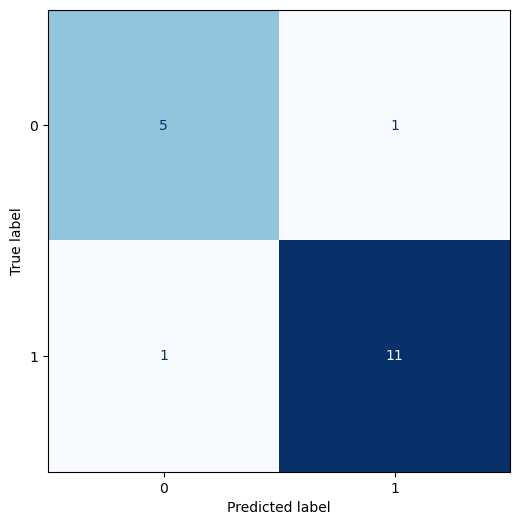

In [26]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [27]:
print(accuracy_score(y_test, model.predict(X_test)))
print(precision_score(y_test, model.predict(X_test)))
print(recall_score(y_test, model.predict(X_test)))
print(f1_score(y_test, model.predict(X_test)))

0.8888888888888888
0.9166666666666666
0.9166666666666666
0.9166666666666666


In [28]:
print(accuracy_score(y_train, model.predict(X_train)))
print(precision_score(y_train, model.predict(X_train)))
print(recall_score(y_train, model.predict(X_train)))
print(f1_score(y_train, model.predict(X_train)))

0.8472222222222222
0.8717948717948718
0.85
0.8607594936708861
